# Objective: Analysis of Movie Profitability across Release Months

To determine profitability across release seasons, aiming to guide our company’s strategy in Releasing films during the seasons which more likely to generate more profits.

### 1. Loading and exploring the Data (tn.movie_budgets.csv)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
from datetime import datetime



In [52]:
# Read the csv file into a Dataframe
movie_budgets_df = pd.read_csv('../../DataSets/tn.movie_budgets.csv')


movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [53]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [54]:
# Extract month  from release_date for seasonality analysis
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'], format="%b %d, %Y", errors='coerce')
movie_budgets_df['release_month'] = movie_budgets_df['release_date'].dt.month

In [55]:
# Generate the unique available months
movie_budgets_df['release_month'].unique()

array([12,  5,  6,  4, 11,  7,  3,  2, 10,  8,  9,  1], dtype=int64)

In [56]:
# Data Type Concersion finacial columns from object to float
financial_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in financial_columns:
    movie_budgets_df[col] = movie_budgets_df[col].replace('[\$,]', '', regex=True).astype(float)

movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_month      5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 316.3+ KB


# Calculating Profitability Ratio of the movies

Profitability Ratio = (Total_gross - production budget)/production budget

In [57]:


# Calculate Total gross
movie_budgets_df['total_gross'] = movie_budgets_df['worldwide_gross'] + movie_budgets_df['domestic_gross']

# Calculate profitability_ratio
#movie_budgets_df['profitability_ratio'] = (movie_budgets_df['total_gross'] - movie_budgets_df['production_budget'])
movie_budgets_df['cost_ratio'] = (movie_budgets_df['total_gross'] / movie_budgets_df['production_budget'])
movie_budgets_df['profitability_ratio'] = (movie_budgets_df['total_gross'] - movie_budgets_df['production_budget']) / movie_budgets_df['production_budget']


movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,total_gross,cost_ratio,profitability_ratio
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,3.536853e+09,8.322007,7.322007
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,1.286728e+09,3.133774,2.133774
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,1.925247e+08,0.550071,-0.449929
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,1.862020e+09,5.632244,4.632244
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,1.936903e+09,6.110105,5.110105


In [58]:
# Generate descriptive statistics for production_budget, domestic_gross, worldwide_gross, and profitability_ratio

financial_summary = movie_budgets_df[['production_budget', 'total_gross', 'profitability_ratio', 'cost_ratio']].describe()
financial_summary


,production_budget,total_gross,profitability_ratio,cost_ratio
count,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,3.158776e+07,1.333608e+08,6.783702,7.783702
std,4.181208e+07,2.399411e+08,54.922090,54.922090
min,1.100000e+03,0.000000e+00,-1.000000,0.000000
25%,5.000000e+06,6.448924e+06,-0.202878,0.797122
50%,1.700000e+07,4.605855e+07,1.659315,2.659315
75%,4.000000e+07,1.506937e+08,4.893170,5.893170
max,4.250000e+08,3.536853e+09,3599.000000,3600.000000


In [ ]:
most_profit = movie_budgets_df.sort_values(by='total_gross', ascending=False)
most_profit[['movie', 'release_month', 'production_budget', 'total_gross', 'profitability_ratio', 'cost_ratio']]

In [76]:
# Calculate average domestic and worldwide gross, and profitability by month
monthly_seasonality = movie_budgets_df.groupby('release_month').agg(
    #avg_total_gross=('total_gross', 'mean'),
    avg_profitability_ratio=('profitability_ratio', 'mean'),
    avg_cost_ratio = ('cost_ratio', 'mean')
).sort_values(by='avg_profitability_ratio', ascending=False)

print("Monthly Seasonality:\n", monthly_seasonality)


Monthly Seasonality:
                avg_profitability_ratio  avg_cost_ratio
release_month                                         
6                            13.144836       14.144836
7                             8.465634        9.465634
8                             8.119027        9.119027
5                             7.217944        8.217944
10                            7.132475        8.132475
2                             6.655746        7.655746
1                             6.134038        7.134038
11                            5.997778        6.997778
3                             5.774310        6.774310
9                             5.096334        6.096334
4                             4.814233        5.814233
12                            4.142139        5.142139


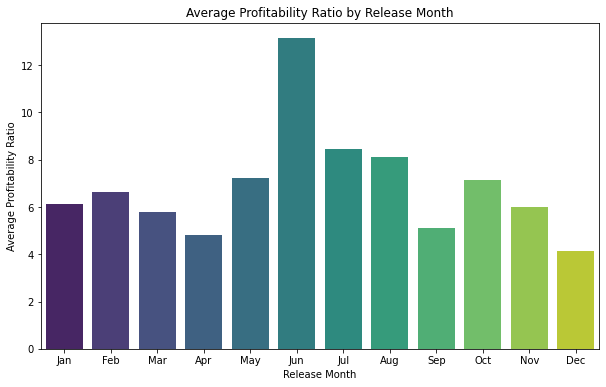

In [ ]:
# Plotting profitability ratio across months
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_seasonality.index, y=monthly_seasonality['avg_profitability_ratio'], palette='viridis')

# Labeling the plot
plt.title("Average Profitability Ratio by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Profitability Ratio")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.show()


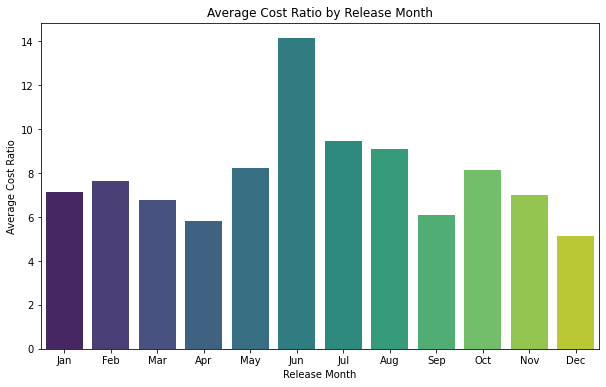

In [62]:
# Plotting Cost ratio across months
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_seasonality.index, y=monthly_seasonality['avg_cost_ratio'], palette='viridis')

# Labeling the plot
plt.title("Average Cost Ratio by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Cost Ratio")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.show()

In [92]:
# Step 3: Correlation Analysis
pearson_corr, _ = pearsonr(monthly_seasonality['avg_profitability_ratio'], monthly_seasonality['avg_cost_ratio'])


In [93]:
# Display Correlation Results, 
pearson_corr

1.0

Given that Peason_corr is 1, The relationship is linear meaning that an increase in Production Budget directly leads to increase in profit across release months
